In [1]:
# coding=utf-8
import pandas as pd
import csv  # Import csv
import tweepy
import re
import string
import nltk
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
pd.set_option('display.max_colwidth',1000)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import codecs
df = pd.read_csv('FinalListPreprocessedData.csv', header = None, encoding='utf-8', engine='python')
df.columns = ['ID','User','CREATED_AT','LABEL','stemming_words']
df = df.iloc[1: , :] # start from first column
df.head()

,ID,User,CREATED_AT,LABEL,stemming_words
1,2.0,1.42E+18,7/29/2021 2:40,Other,හාමුදුරුවරු සියලූම පූජකයන්ගේ මානසික සෞඛ්යය සොයා බැලීමේ වැඩ පිලිවලක් ඕනේ
2,3.0,1.42E+18,7/27/2021 10:40,Politics,ද්විපාර්ශවික එකඟතා ජන ජීවිත සෞඛ්යය මනාව ආරක්ෂා කරමින් හැකි ඉක්මණින් ආර්ථිකය
3,4.0,1.42E+18,7/25/2021 20:56,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට යුරෝපීය රට වලට විසා නිකුත් නොකි
4,5.0,1.42E+18,7/25/2021 20:53,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට යුර
5,6.0,1.42E+18,7/25/2021 20:52,Other,කරැනාකර චින නිෂ්පාදිත එන්නත ලබාගත් පුද්ගලයන් හට


In [3]:
df.loc[df['LABEL']=='Crime',"LABEL"] = 0
df.loc[df['LABEL']=='Entertainment',"LABEL"] = 1
df.loc[df['LABEL']=='Politics',"LABEL"] = 3
df.loc[df['LABEL']=='Sport',"LABEL"] = 4
df.loc[df['LABEL']=='Other',"LABEL"] = 5

In [4]:
import matplotlib.pyplot as plt
classes = df.LABEL.unique()
counts = []

for i in classes:
    count = len(df[df.LABEL==i])
    counts.append(count)

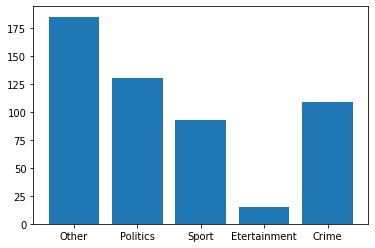

In [5]:
plt.bar(['Other','Politics','Sport','Etertainment','Crime'], counts)
plt.show()

In [6]:
########## vectorizer ######################

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df['stemming_words'],df['LABEL'],random_state=50)

In [8]:
print(x_train)

217                                                                                                                                                                                  ගුරුවරුන්ට ඇමති බන්දුල පණිවිඩයක වැටුප් කල හැකි ක්රම කියයි
318                                                                                                                                                           රාජපක්ෂ සොහොන අයිතිකාරයො නැති මල්වානෙ මාළිගාව ආසියාවෙ දෙවැනි තුංවැනි බිලියනපතියො
209    හිටපු ඇමති මංගල සමරවීර මහතාගේ ප්රධානත්වය සැබෑ දේශප්රේමියෝ සංවිධානය එලි දැක්වීමේදී අවස්ථාවේදී ඔහු විසන් ඉදිරිපත් කරන ලද කරුණු මෙසේය සැබෑ දේශප්රේමීන් පවත්වන මුල්ම මාධ්යය සාකච්ඡාවට කාර්යාලයට පැමිණි ඔබ සියලු දෙනාව අපි සාදරයෙන් පිළිගන්න
158                                            සංචාරක ක්ෂේත්ර ප්රවර්ධන සැලැස්ම සංචාරක ආකර්ෂණය ජලජ ගුවන ධාවන පථ පිහිටුවිය හැකි ස්ථාන හඳුනා ගෙන තිබෙන සංචාරක ඇමති ප්රසන්න රණතුංග මහතා පවසයි ජලජ ගුවන පථ ක්රියාත්මක බෙන්තොට ගඟ කැළණි ගඟ පොල්ගොල්ල
274                                         

In [9]:
print(y_train)

217    5
318    5
209    5
158    3
274    5
      ..
71     1
133    3
290    5
110    5
481    5
Name: LABEL, Length: 399, dtype: object


In [10]:
####### Bag of word ###########

In [11]:
vect = CountVectorizer().fit(x_train)

In [12]:
vect.get_feature_names()

['අක',
 'අග',
 'අගද',
 'අගන',
 'අගම',
 'අගය',
 'අඟහර',
 'අජ',
 'අට',
 'අඩ',
 'අත',
 'අතර',
 'අතරට',
 'අද',
 'අදත',
 'අදය',
 'අදහස',
 'අධ',
 'අන',
 'අනත',
 'අඳ',
 'අප',
 'අපග',
 'අපච',
 'අපය',
 'අපර',
 'අපව',
 'අබ',
 'අභ',
 'අම',
 'අමත',
 'අමතක',
 'අමතර',
 'අමරස',
 'අය',
 'අයක',
 'අයට',
 'අයත',
 'අර',
 'අරග',
 'අරන',
 'අරම',
 'අරල',
 'අරව',
 'අල',
 'අලහප',
 'අව',
 'අවතක',
 'අවද',
 'අවධ',
 'අවබ',
 'අවම',
 'අවමග',
 'අවමය',
 'අවශ',
 'අවස',
 'අවසන',
 'අස',
 'අසන',
 'අසරණය',
 'අසරන',
 'අසල',
 'අහ',
 'අහන',
 'අහනව',
 'අහමත',
 'අහය',
 'අහස',
 'අළ',
 'ආකර',
 'ආච',
 'ආඩම',
 'ආණ',
 'ආද',
 'ආදර',
 'ආදරය',
 'ආදරයය',
 'ආධ',
 'ආන',
 'ආපද',
 'ආබ',
 'ආය',
 'ආයතනයට',
 'ආයතනවල',
 'ආර',
 'ආරක',
 'ආවරණ',
 'ආශ',
 'ආස',
 'ආසන',
 'ඇඟ',
 'ඇඟප',
 'ඇඟව',
 'ඇඩ',
 'ඇත',
 'ඇද',
 'ඇන',
 'ඇනතන',
 'ඇඳ',
 'ඇඳග',
 'ඇප',
 'ඇම',
 'ඇමත',
 'ඇමර',
 'ඇයග',
 'ඇයට',
 'ඇයම',
 'ඇර',
 'ඇරඹ',
 'ඇල',
 'ඇව',
 'ඇස',
 'ඇහ',
 'ඇෆ',
 'ඈත',
 'ඉක',
 'ඉග',
 'ඉඩ',
 'ඉඩක',
 'ඉඩම',
 'ඉඩමක',
 'ඉඩමකඒක',
 'ඉත',
 'ඉද',
 'ඉදග',
 'ඉන',
 'ඉඳන',
 'ඉඳල

In [13]:
len(vect.get_feature_names())

955

In [14]:
x_train_vectorized = vect.transform(x_train)

In [15]:
x_train_vectorized

<399x955 sparse matrix of type '<class 'numpy.int64'>'
	with 4862 stored elements in Compressed Sparse Row format>

In [16]:
print(x_train_vectorized)

  (0, 102)	1
  (0, 274)	1
  (0, 381)	1
  (0, 529)	1
  (0, 578)	1
  (0, 667)	1
  (0, 721)	1
  (0, 809)	1
  (1, 34)	1
  (1, 88)	1
  (1, 339)	1
  (1, 626)	1
  (1, 657)	1
  (1, 727)	1
  (2, 21)	1
  (2, 55)	1
  (2, 102)	1
  (2, 123)	1
  (2, 189)	1
  (2, 209)	1
  (2, 216)	1
  (2, 227)	1
  (2, 252)	1
  (2, 263)	1
  (2, 295)	1
  :	:
  (397, 418)	1
  (397, 454)	1
  (397, 461)	1
  (397, 578)	1
  (397, 585)	1
  (397, 595)	2
  (397, 641)	1
  (397, 655)	1
  (397, 753)	1
  (397, 768)	1
  (397, 797)	1
  (397, 819)	1
  (397, 879)	1
  (397, 919)	1
  (397, 942)	1
  (398, 13)	1
  (398, 17)	1
  (398, 148)	1
  (398, 252)	1
  (398, 336)	1
  (398, 418)	1
  (398, 435)	1
  (398, 617)	2
  (398, 641)	1
  (398, 818)	1


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:

y_train = y_train.astype('int')
model.fit(x_train_vectorized,y_train)


LogisticRegression()

In [19]:
predictions = model.predict(vect.transform(x_test))

In [20]:
print(predictions)

[0 0 0 4 3 3 3 3 0 4 5 0 5 0 3 5 3 3 0 5 5 3 3 3 3 1 0 4 0 0 5 0 5 3 5 4 5
 3 3 3 3 4 3 5 5 0 3 5 5 5 5 5 5 4 3 5 5 3 5 3 5 5 5 0 5 5 4 3 5 0 4 4 0 5
 5 3 3 5 5 3 0 4 3 5 3 4 4 0 4 5 3 3 4 4 0 4 5 5 3 5 0 5 5 4 0 3 0 3 5 0 5
 5 5 5 3 5 5 4 5 0 0 3 5 5 5 0 3 4 4 3 3 0 5]


In [21]:
actual = np.array(y_test)
actual

array([0, 0, 0, 4, 3, 3, 3, 5, 0, 4, 0, 0, 5, 0, 4, 0, 3, 5, 0, 3, 5, 4,
       5, 3, 3, 1, 0, 4, 0, 0, 5, 0, 0, 3, 5, 4, 5, 0, 0, 3, 3, 4, 3, 5,
       1, 3, 5, 5, 3, 4, 5, 3, 3, 4, 3, 5, 5, 3, 5, 5, 3, 4, 5, 0, 5, 3,
       4, 5, 0, 0, 4, 5, 0, 3, 3, 5, 3, 3, 5, 3, 0, 3, 0, 5, 3, 4, 5, 5,
       4, 5, 4, 3, 4, 1, 0, 3, 5, 3, 3, 5, 0, 0, 5, 4, 5, 3, 0, 4, 0, 4,
       3, 3, 5, 5, 5, 5, 4, 4, 1, 0, 0, 3, 5, 5, 5, 0, 3, 4, 4, 5, 3, 0,
       5], dtype=object)

In [22]:
count = 0
for i in range (len(predictions)):
    if predictions[i] == actual[i]:
        count = count +1

In [23]:
count #correct prediction

85

In [24]:
len(predictions) #total prediction

133

In [25]:
85/133 ###### probbility

0.6390977443609023